# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset.
This lab will ask you to do a deeper data exploration

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_07_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

print("Preview of the dataset:")
print(df.head())

print("\nDataframe Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Preview of the dataset:
   order_id  order_date order_year_month  customer_name               city  \
0     51188  2023-07-01          2023-07  Audrey Blanco  North Cherylmouth   
1     51187  2023-07-01          2023-07    Isaac Allen         Traceyland   
2     51199  2023-07-02          2023-07     Ian Morgan          Dylanberg   
3     51241  2023-07-04          2023-07     Alexa Bell     Lake Tracytown   
4     51297  2023-07-08          2023-07     Casey Diaz        Byrdchester   

  state_province                    email order_type  quantity  \
0  New Hampshire  audrey_blanco@email.com     Retail       3.0   
1  West Virginia    isaac_allen@email.com     Online       4.0   
2   South Dakota     ian_morgan@email.com     Online       5.0   
3      Wisconsin     alexa_bell@email.com     Online       1.0   
4    Mississippi     casey_diaz@email.com     Online       1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Incl

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to categories if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [8]:
# 确保数值型数据类型正确
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["product_price"] = pd.to_numeric(df["product_price"], errors="coerce")

# 将 `order_type` 和 `product_status` 转换为类别变量
df["order_type"] = df["order_type"].astype("category")
df["product_status"] = df["product_status"].astype("category")

# 确保 `order_date` 是日期类型
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

print("Data types after conversion:")
print(df.dtypes)


Data types after conversion:
order_id                     int64
order_date          datetime64[ns]
order_year_month            object
customer_name               object
city                        object
state_province              object
email                       object
order_type                category
quantity                   float64
product_name                object
product_line                object
product_price              float64
product_status            category
dtype: object


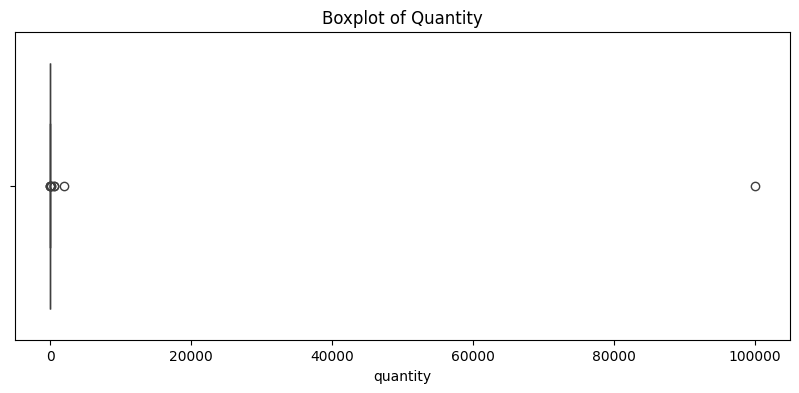

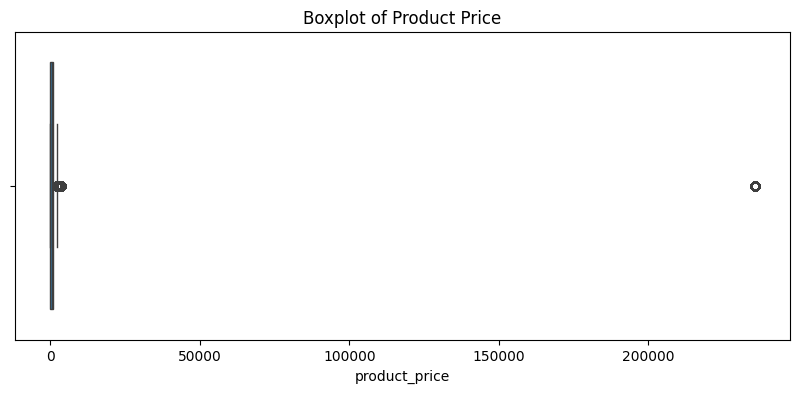

Removed 4079 outliers


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用箱线图检查 `quantity` 和 `product_price` 的异常值
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["quantity"])
plt.title("Boxplot of Quantity")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df["product_price"])
plt.title("Boxplot of Product Price")
plt.show()

# 计算IQR范围并移除异常值
Q1 = df[["quantity", "product_price"]].quantile(0.25)
Q3 = df[["quantity", "product_price"]].quantile(0.75)
IQR = Q3 - Q1

# 计算 IQR（四分位距）
Q1 = df[["quantity", "product_price"]].quantile(0.25)
Q3 = df[["quantity", "product_price"]].quantile(0.75)
IQR = Q3 - Q1

# 修正布尔索引方式，确保索引对齐
df_cleaned = df[~((df[["quantity", "product_price"]] < (Q1 - 1.5 * IQR)) |
                  (df[["quantity", "product_price"]] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Removed {df.shape[0] - df_cleaned.shape[0]} outliers")

# 更新数据集
df = df_cleaned


In [12]:
# 查看缺失值
print("Missing values before imputation:")
print(df.isnull().sum())

# 填充 `state_province` 的缺失值（使用众数）
df["state_province"].fillna(df["state_province"].mode()[0], inplace=True)

# 确保 `quantity` 和 `product_price` 没有缺失值（填充为中位数）
df["quantity"].fillna(df["quantity"].median(), inplace=True)
df["product_price"].fillna(df["product_price"].median(), inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
order_id              0
order_date           85
order_year_month     30
customer_name         0
city                448
state_province        0
email                 0
order_type            0
quantity              0
product_name          0
product_line          0
product_price         0
product_status        0
dtype: int64
Missing values after imputation:
order_id              0
order_date           85
order_year_month     30
customer_name         0
city                448
state_province        0
email                 0
order_type            0
quantity              0
product_name          0
product_line          0
product_price         0
product_status        0
dtype: int64


<ipython-input-12-af66a67f2254>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["state_province"].fillna(df["state_province"].mode()[0], inplace=True)
<ipython-input-12-af66a67f2254>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["quantity"].fillna(df["quantity"].median(), inplace=True)
<ipython-input-12-af66a67f2254>:9: SettingWithCo

In [13]:
# 计算总金额
df["total_amount"] = df["quantity"] * df["product_price"]

# 显示新变量
print(df[["quantity", "product_price", "total_amount"]].head())


   quantity  product_price  total_amount
0       3.0         649.99       1949.97
3       1.0         649.99        649.99
4       1.0         649.99        649.99
5       1.0         649.99        649.99
6       1.0         649.99        649.99


<ipython-input-13-091dfbc6049e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_amount"] = df["quantity"] * df["product_price"]


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [14]:
# 定义必须完整的客户字段
customer_fields = ["customer_name", "city", "state_province", "email"]

# 如果所有客户字段都非空，则 `complete_customer_info` 设为 1，否则设为 2
df["complete_customer_info"] = df[customer_fields].notnull().all(axis=1).astype(int).replace({1: 1, 0: 2})

# 查看新变量
print(df[["customer_name", "city", "state_province", "email", "complete_customer_info"]].head())


      customer_name               city state_province  \
0     Audrey Blanco  North Cherylmouth  New Hampshire   
3        Alexa Bell     Lake Tracytown      Wisconsin   
4        Casey Diaz        Byrdchester    Mississippi   
5    Troy Rodriguez  South Brendamouth           Ohio   
6  Natalie Phillips        Rachelburgh        Alabama   

                        email  complete_customer_info  
0     audrey_blanco@email.com                       1  
3        alexa_bell@email.com                       1  
4        casey_diaz@email.com                       1  
5    troy_rodriguez@email.com                       1  
6  natalie_phillips@email.com                       1  


<ipython-input-14-6f26d63bde2e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["complete_customer_info"] = df[customer_fields].notnull().all(axis=1).astype(int).replace({1: 1, 0: 2})


<ipython-input-15-7772d0081c7c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=["green", "red"])


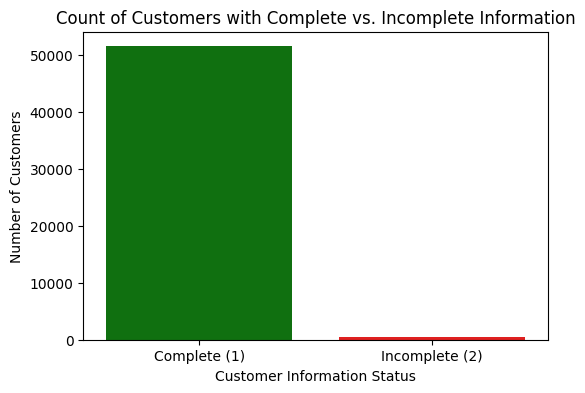

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 统计完整和不完整的客户信息数量
counts = df["complete_customer_info"].value_counts().sort_index()

# 创建条形图
plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values, palette=["green", "red"])
plt.xticks(ticks=[0, 1], labels=["Complete (1)", "Incomplete (2)"])
plt.xlabel("Customer Information Status")
plt.ylabel("Number of Customers")
plt.title("Count of Customers with Complete vs. Incomplete Information")
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Spring, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [16]:
# 提取月份
df["month"] = df["order_date"].dt.month

# 定义季节分类
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# 创建 `season` 变量
df["season"] = df["month"].apply(get_season)

# 查看数据
print(df[["order_date", "month", "season"]].head())


  order_date  month  season
0 2023-07-01    7.0  Summer
3 2023-07-04    7.0  Summer
4 2023-07-08    7.0  Summer
5 2023-07-09    7.0  Summer
6 2023-07-11    7.0  Summer


<ipython-input-16-9f12b1a593b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["order_date"].dt.month
<ipython-input-16-9f12b1a593b3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["season"] = df["month"].apply(get_season)


<ipython-input-17-bb1e7b74df83>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="total_amount", data=seasonal_revenue, palette="coolwarm")


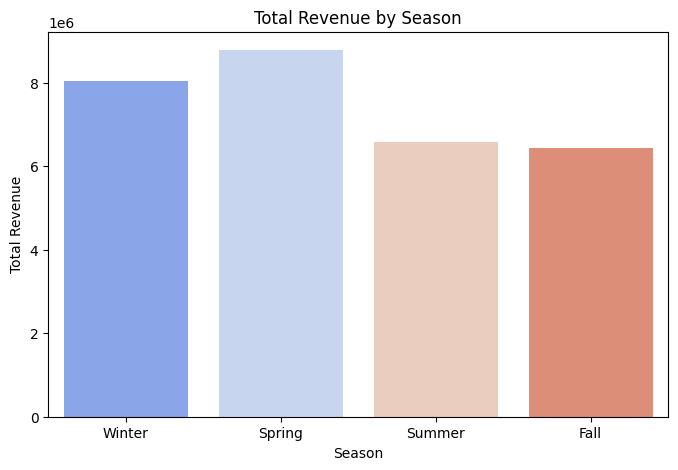

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 按季节计算总收入
seasonal_revenue = df.groupby("season")["total_amount"].sum().reset_index()

# 按季节排序
seasonal_order = ["Winter", "Spring", "Summer", "Fall"]
seasonal_revenue["season"] = pd.Categorical(seasonal_revenue["season"], categories=seasonal_order, ordered=True)

# 绘制收入按季节分布的柱状图
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="total_amount", data=seasonal_revenue, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Season")
plt.show()


<ipython-input-18-803465d0e758>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["order_date"].dt.year


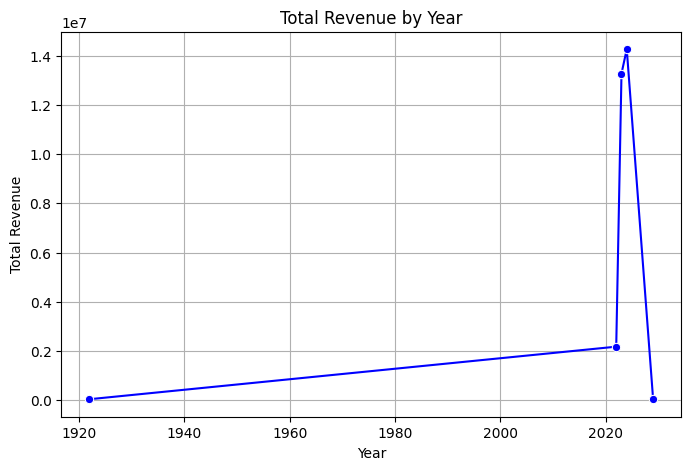

In [18]:
# 提取年份
df["year"] = df["order_date"].dt.year

# 按年份计算总收入
yearly_revenue = df.groupby("year")["total_amount"].sum().reset_index()

# 绘制收入按年份变化的折线图
plt.figure(figsize=(8, 5))
sns.lineplot(x="year", y="total_amount", data=yearly_revenue, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Year")
plt.grid(True)
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [19]:
# 定义室内（Indoor）和室外（Outdoor）产品分类
outdoor_products = ["Bikes", "Camping Gear", "Sports Equipment", "Outdoor Furniture"]
indoor_products = ["Phones", "Laptops", "Appliances", "Home Decor", "Office Supplies"]

# 创建新变量 `indoor_outdoor`
def categorize_product(product_line):
    if product_line in outdoor_products:
        return "Outdoor"
    elif product_line in indoor_products:
        return "Indoor"
    else:
        return "Other"

df["indoor_outdoor"] = df["product_line"].apply(categorize_product)

# 查看新变量
print(df[["product_line", "indoor_outdoor"]].head())


  product_line indoor_outdoor
0       Mobile          Other
3       Mobile          Other
4       Mobile          Other
5       Mobile          Other
6       Mobile          Other


<ipython-input-19-f4e8ce37d9ed>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["indoor_outdoor"] = df["product_line"].apply(categorize_product)


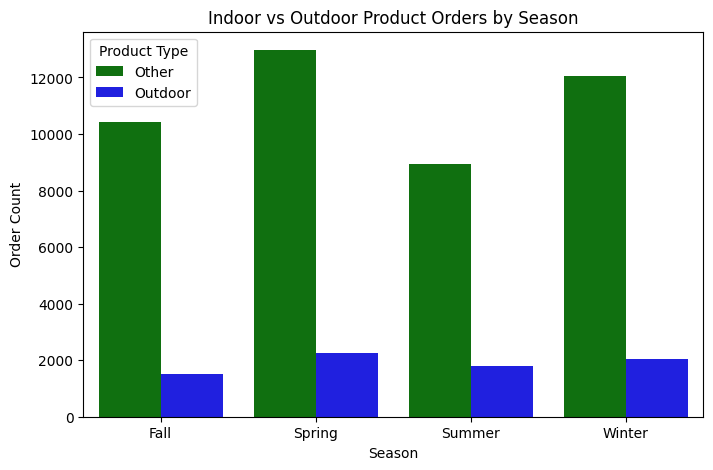

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算每个季节 Indoor/Outdoor 产品的订单数量
seasonal_product_counts = df.groupby(["season", "indoor_outdoor"]).size().reset_index(name="count")

# 绘制柱状图
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="count", hue="indoor_outdoor", data=seasonal_product_counts, palette=["green", "blue"])
plt.xlabel("Season")
plt.ylabel("Order Count")
plt.title("Indoor vs Outdoor Product Orders by Season")
plt.legend(title="Product Type")
plt.show()
